### **Supermarket Sales Prediction using Supervised Learning**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
data = '/content/drive/MyDrive/Ascend/Colab Notebooks/supermarket_sales - Sheet1.csv'
df = pd.read_csv(data)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [19]:
df = df.drop(['Invoice ID', 'Date', 'Time'], axis=1)
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [20]:
df.dtypes

,0
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64
Payment,object


In [21]:
df.describe(include='all')

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,3,3,2,2,6,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,Ewallet,NaN,NaN,NaN,NaN
freq,340,340,501,501,178,NaN,NaN,NaN,NaN,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,448.90500,4.761905,22.445250,8.50000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 

In [23]:
df.dtypes

,0
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64
Payment,object


In [24]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [25]:
df.isnull().sum()

,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0
Payment,0


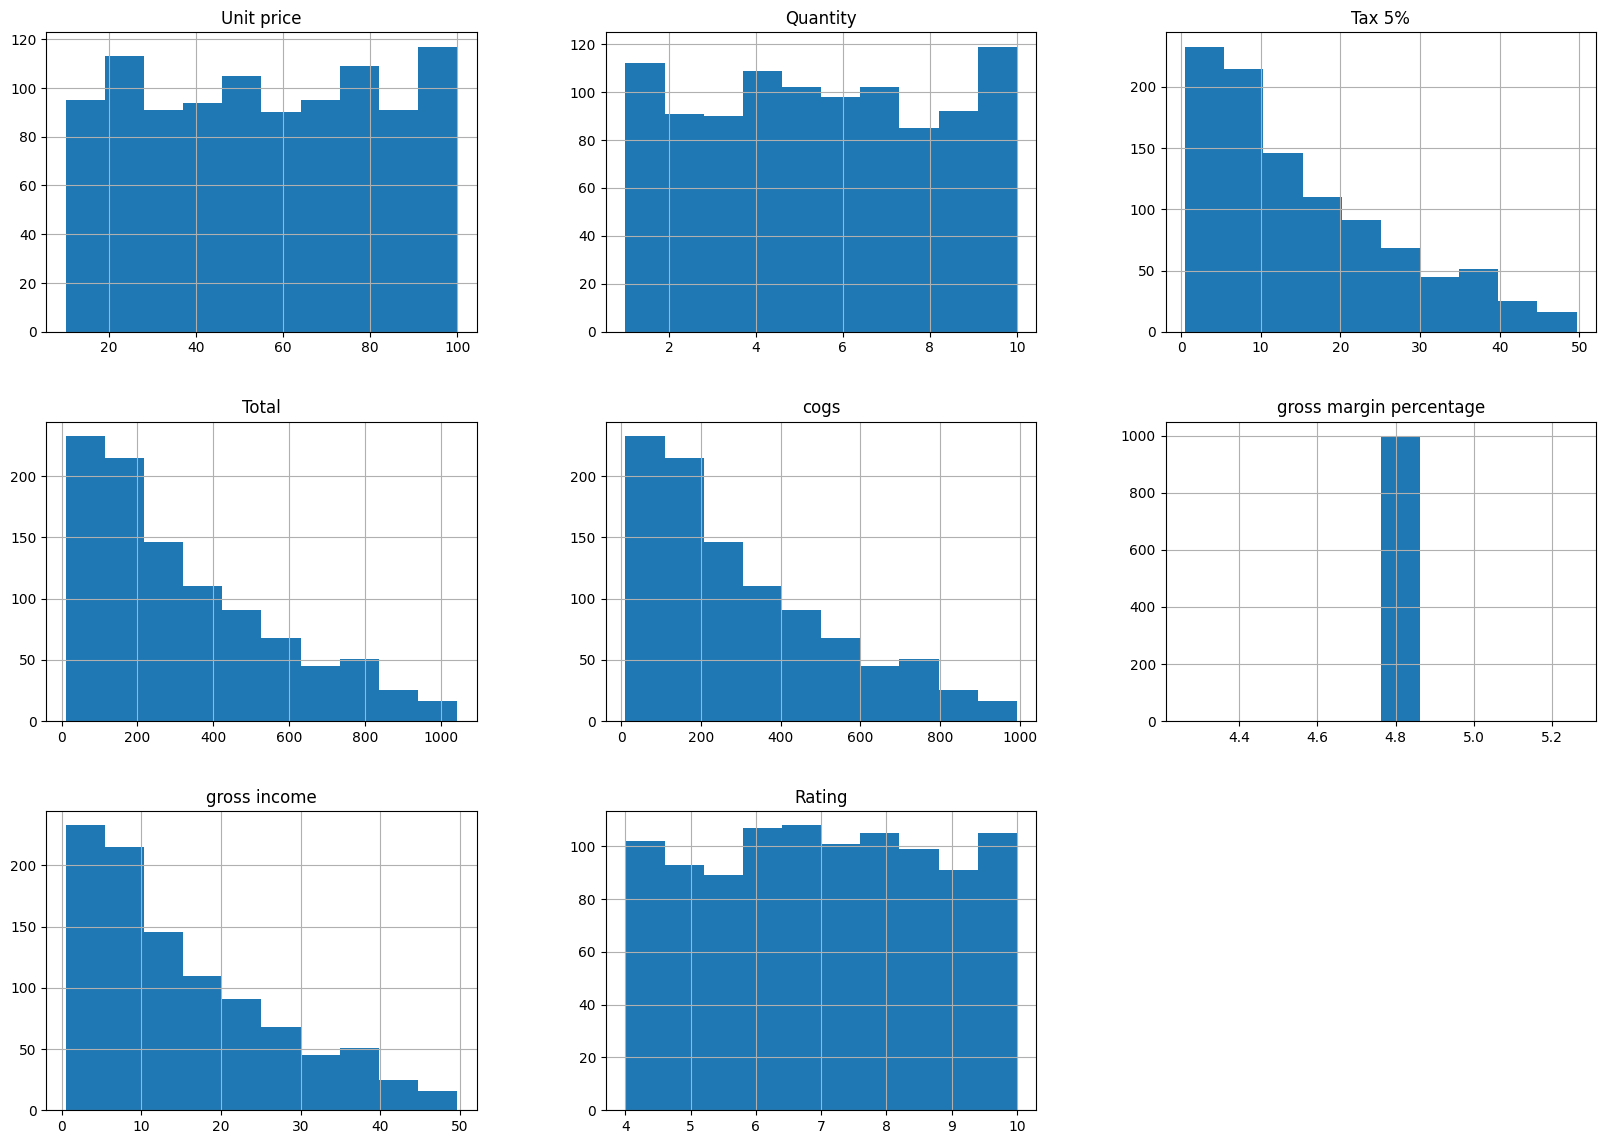

In [28]:
df.hist(figsize=(20,14))
plt.show()

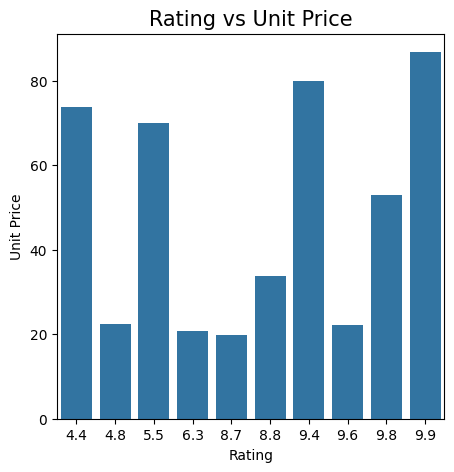

In [30]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

In [31]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

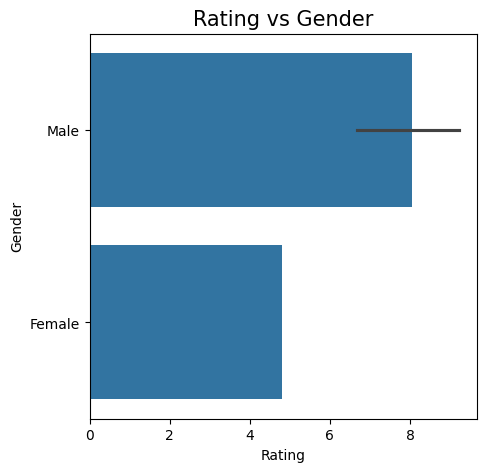

In [32]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=df[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

In [33]:
list_1=list(df.columns)

In [34]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [37]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4
997,0,2,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7
998,0,2,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1


In [38]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [40]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.57      0.55       100
           1       0.53      0.48      0.50       100

    accuracy                           0.53       200
   macro avg       0.53      0.52      0.52       200
weighted avg       0.53      0.53      0.52       200

Confusion Matrix:
 [[57 43]
 [52 48]]
Training Score:
 66.0


In [43]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [45]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.44      0.47       100
           1       0.50      0.57      0.54       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Confusion Matrix:
 [[44 56]
 [43 57]]
Training Score:
 54.37499999999999


In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [62]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.54      0.61      0.57       100
           1       0.55      0.47      0.51       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200

Confusion Matrix:
 [[61 39]
 [53 47]]
Training Score:
 64.875


In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51       100
           1       0.52      0.56      0.54       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200

Confusion Matrix:
 [[49 51]
 [44 56]]
Training Score:
 100.0


In [55]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
993,1,0
859,0,0
298,1,1
553,1,1
672,0,0
...,...,...
679,1,0
722,1,1
215,1,0
653,1,0


Kesimpulan:
Akurasi pada algoritma tertinggi ditunjukkan oleh algoritma 'Random Forest Classifier' yang memiliki nilai sempurna atau 100%. Sedangkan di posisi kedua ada algoritma 'KNN(K-Neighbors Classifier)' dengan akurasi 66% dan di posisi ketiga adalah algoritma 'Decision Tree' dengan akurasi 64% dan terakhir algoritma 'SVM(Support Vector Machine)' dengan akurasi 54%.